<a href="https://colab.research.google.com/github/cmliaa/house-prediction/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/cmliaa/house-prediction/refs/heads/main/housing.csv'
df = pd.read_csv(url)

In [ ]:
df

,size_sqft,bedrooms,age_years,distance_km,price
0,1673.8,2,15.5,10.39,99049.34
1,1451.6,2,34.5,1.85,91012.91
2,1726.7,3,35.8,4.36,79344.01
3,2033.1,3,14.8,9.14,154351.34
4,1418.0,5,15.8,2.74,122179.30
...,...,...,...,...,...
495,1688.6,5,18.1,4.08,111808.23
496,1137.0,4,20.6,9.21,95366.33
497,1433.4,1,25.3,10.46,81318.59
498,1193.5,4,19.3,8.65,100419.83


Iter    0 | cost=4418631423.1129 | w=999.200243 | b=4617.942823
Iter  200 | cost=389186062.5390 | w=19983.339391 | b=92355.780900
Iter  400 | cost=389186057.5880 | w=19984.004836 | b=92358.856346
Iter  600 | cost=389186057.5880 | w=19984.004859 | b=92358.856453
Iter  800 | cost=389186057.5880 | w=19984.004859 | b=92358.856453
Iter 1000 | cost=389186057.5880 | w=19984.004859 | b=92358.856453
Iter 1200 | cost=389186057.5880 | w=19984.004859 | b=92358.856453
Iter 1400 | cost=389186057.5880 | w=19984.004859 | b=92358.856453
Iter 1600 | cost=389186057.5880 | w=19984.004859 | b=92358.856453
Iter 1800 | cost=389186057.5880 | w=19984.004859 | b=92358.856453
Train metrics:
MSE : 778372115.1760
RMSE: 27899.3211
MAE : 21949.2409
R²  : 0.3391

Test metrics:
MSE : 739363766.8988
RMSE: 27191.2443
MAE : 22251.2976
R²  : 0.2014
Params on original scale: w=58.705661, b=4250.206627
sklearn -> coef_=58.705661, intercept_=4250.206627
Δcoef: 9.237055564881302e-14 Δintercept: 0.0


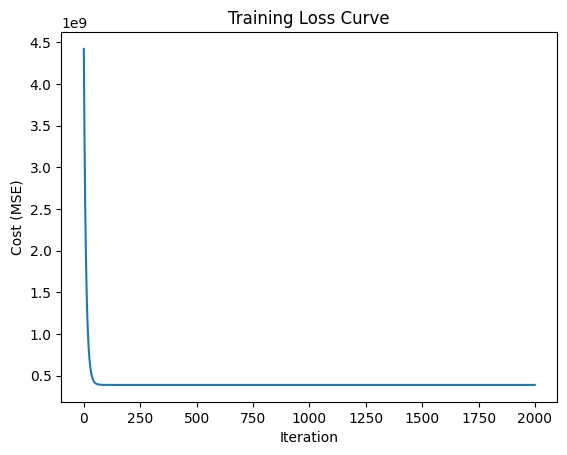

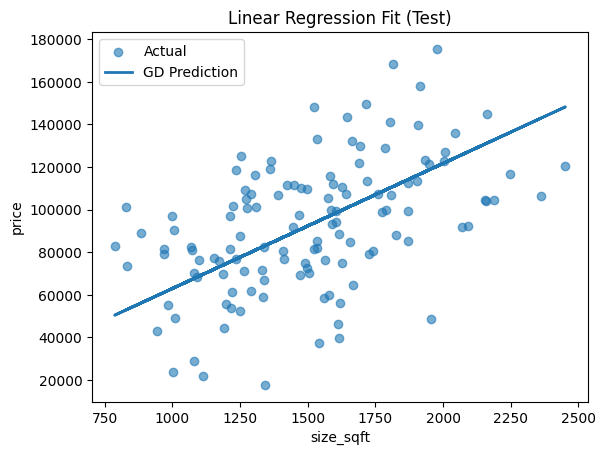

In [2]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import inspect


X = df['size_sqft'].to_numpy(dtype=float)   # shape (m,)
y = df['price'].to_numpy(dtype=float)       # shape (m,)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=True, random_state=104
)

mu = X_train.mean()
sigma = X_train.std(ddof=0)

if sigma == 0:
    X_train_norm = np.zeros_like(X_train)
    X_test_norm  = np.zeros_like(X_test)
else:
    X_train_norm = (X_train - mu) / sigma
    X_test_norm  = (X_test  - mu) / sigma

X_train_norm = X_train_norm.reshape(-1, 1)
X_test_norm  = X_test_norm.reshape(-1, 1)

w, b = 0.0, 0.0

def predict(Xn, w, b):
    return Xn * w + b

def compute_cost(Xn, y_vec, w, b):
    m = len(Xn)
    err = predict(Xn, w, b).ravel() - y_vec
    return (err @ err) / (2 * m)

def compute_grads(Xn, y_vec, w, b):
    m = len(Xn)
    yhat = predict(Xn, w, b).ravel()
    err = yhat - y_vec
    dw = float((err @ Xn.ravel()) / m)
    db = float(err.mean())
    return dw, db

n_iters = 2000
alpha = 0.05
cost_history = []

for i in range(n_iters):
    dw, db = compute_grads(X_train_norm, y_train, w, b)
    w -= alpha * dw
    b -= alpha * db
    c = compute_cost(X_train_norm, y_train, w, b)
    cost_history.append(c)
    if i % 200 == 0:
        print(f"Iter {i:4d} | cost={c:.4f} | w={w:.6f} | b={b:.6f}")

def mse(y_true, y_pred):
    y_true, y_pred = np.ravel(y_true), np.ravel(y_pred)
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    y_true, y_pred = np.ravel(y_true), np.ravel(y_pred)
    return np.mean(np.abs(y_true - y_pred))

def r2(y_true, y_pred):
    y_true, y_pred = np.ravel(y_true), np.ravel(y_pred)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

def regression_metrics(y_true, y_pred):
    print(f"MSE : {mse(y_true, y_pred):.4f}")
    print(f"RMSE: {rmse(y_true, y_pred):.4f}")
    print(f"MAE : {mae(y_true, y_pred):.4f}")
    print(f"R²  : {r2(y_true, y_pred):.4f}")

yhat_train = predict(X_train_norm, w, b).ravel()
yhat_test  = predict(X_test_norm,  w, b).ravel()

print("Train metrics:")
regression_metrics(y_train, yhat_train)

print("\nTest metrics:")
regression_metrics(y_test, yhat_test)

if sigma == 0:
    w_orig, b_orig = 0.0, b
else:
    w_orig = w / sigma
    b_orig = b - (w * mu / sigma)

print(f"Params on original scale: w={w_orig:.6f}, b={b_orig:.6f}")

lr = LinearRegression().fit(X_train.reshape(-1,1), y_train)
print(f"sklearn -> coef_={lr.coef_[0]:.6f}, intercept_={lr.intercept_:.6f}")
print("Δcoef:", abs(lr.coef_[0] - w_orig), "Δintercept:", abs(lr.intercept_ - b_orig))

plt.figure()
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Training Loss Curve")
plt.show()

plt.figure()
plt.scatter(X_test, y_test, alpha=0.6, label="Actual")
plt.plot(X_test, yhat_test, linewidth=2, label="GD Prediction")
plt.xlabel("size_sqft")
plt.ylabel("price")
plt.title("Linear Regression Fit (Test)")
plt.legend()
plt.show()
